In [1]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel

In [2]:
data = load_breast_cancer()

In [3]:
LR_ = LR(solver="liblinear",C=0.9,random_state=420)
cross_val_score(LR_,data.data,data.target,cv=10).mean()

0.9508145363408522

In [4]:
# 根据l1正则化作特征工程，l1会将无用的特征标记为0
X_embedded = SelectFromModel(LR_,norm_order=1).fit_transform(data.data,data.target)
X_embedded.shape

(569, 9)

In [5]:
cross_val_score(LR_,X_embedded,data.target,cv=10).mean()

0.9368107769423559

(0.0, 30)
(0.10669143894339903, 17)
(0.21338287788679805, 12)
(0.32007431683019705, 11)
(0.4267657557735961, 8)
(0.5334571947169952, 8)
(0.6401486336603941, 6)
(0.7468400726037931, 5)
(0.8535315115471922, 5)
(0.9602229504905913, 5)
(1.0669143894339903, 5)
(1.1736058283773894, 4)
(1.2802972673207882, 2)
(1.3869887062641872, 2)
(1.4936801452075863, 2)
(1.6003715841509853, 1)
(1.7070630230943844, 1)
(1.8137544620377835, 1)
(1.9204459009811825, 1)
(2.0271373399245816, 1)


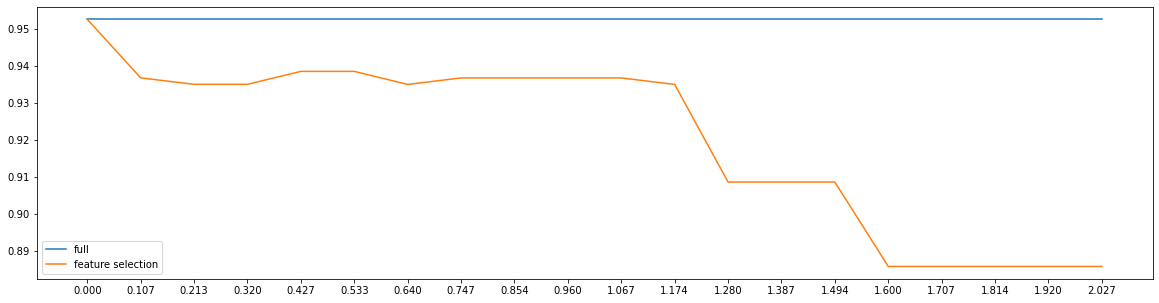

In [6]:
# 通过调整threshold选择特征过滤的范围
fullx = []
fsx = []

threshold = np.linspace(0,abs((LR_.fit(data.data,data.target).coef_)).max(),20)

k=0

for i in threshold:
    X_embedded = SelectFromModel(LR_,threshold=i).fit_transform(data.data,data.target)
    fullx.append(cross_val_score(LR_,data.data,data.target,cv=5).mean())
    fsx.append(cross_val_score(LR_,X_embedded,data.target,cv=5).mean())
    print((threshold[k],X_embedded.shape[1]))
    k+=1
plt.figure(figsize=(20,5))
plt.plot(threshold,fullx,label="full")
plt.plot(threshold,fsx,label="feature selection")
plt.xticks(threshold)
plt.legend()
plt.show()

# 调整逻辑回归的超参数

0.9561090225563911 7.01


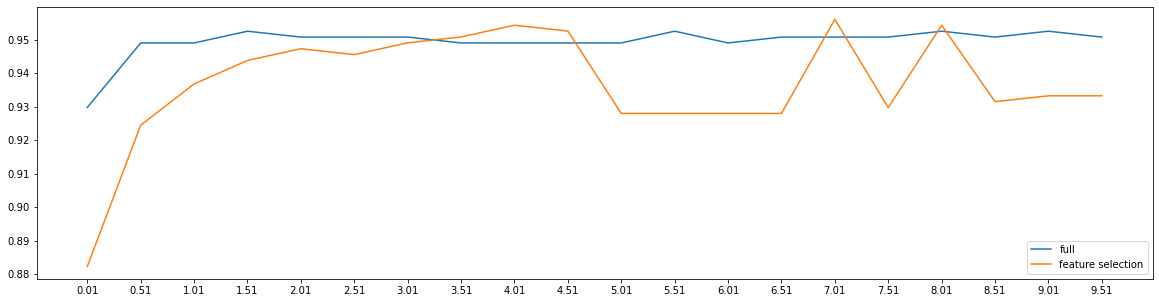

In [7]:
fullx = []
fsx = []

C=np.arange(0.01,10.01,0.5)

for i in C:
    LR_ = LR(solver="liblinear",C=i,random_state=420)
    fullx.append(cross_val_score(LR_,data.data,data.target,cv=10).mean())
    X_embedded = SelectFromModel(LR_,norm_order=1).fit_transform(data.data,data.target)
    fsx.append(cross_val_score(LR_,X_embedded,data.target,cv=10).mean())
print(max(fsx),C[fsx.index(max(fsx))])
plt.figure(figsize=(20,5))
plt.plot(C,fullx,label="full")
plt.plot(C,fsx,label="feature selection")
plt.xticks(C)
plt.legend()
plt.show()

细化学习曲线

0.9561090225563911 6.055


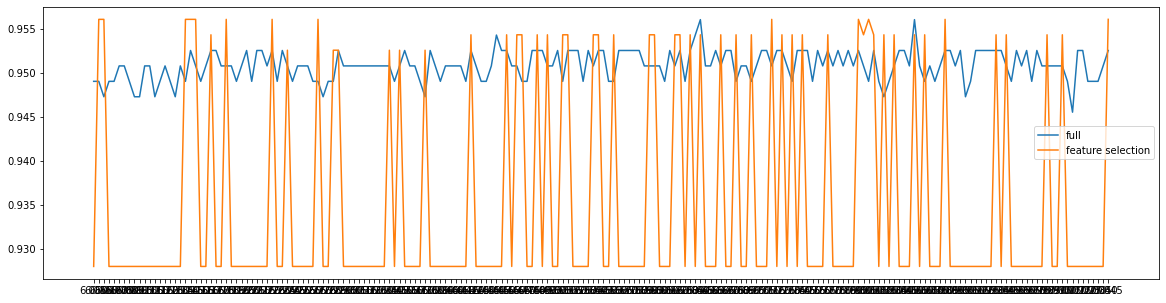

In [8]:
fullx = []
fsx = []

C=np.arange(6.05,7.05,0.005)

for i in C:
    LR_ = LR(solver="liblinear",C=i,random_state=420)
    fullx.append(cross_val_score(LR_,data.data,data.target,cv=10).mean())
    X_embedded = SelectFromModel(LR_,norm_order=1).fit_transform(data.data,data.target)
    fsx.append(cross_val_score(LR_,X_embedded,data.target,cv=10).mean())
print(max(fsx),C[fsx.index(max(fsx))])
plt.figure(figsize=(20,5))
plt.plot(C,fullx,label="full")
plt.plot(C,fsx,label="feature selection")
plt.xticks(C)
plt.legend()
plt.show()

In [11]:
#验证模型效果:降维之前
LR_ = LR(solver="liblinear",C=6.055,random_state=420)
cross_val_score(LR_,data.data,data.target,cv=10).mean()

0.9490601503759398

In [9]:
#验证模型效果:降维之后
LR_ = LR(solver="liblinear",C=6.055,random_state=420)
X_embedded = SelectFromModel(LR_,norm_order=1).fit_transform(data.data,data.target)
cross_val_score(LR_,X_embedded,data.target,cv=10).mean()

0.9561090225563911

In [10]:
X_embedded.shape

(569, 9)